# Data Compression using Singular Value Decomposition by `Mr. Harshit Dawar!`

In [18]:
# Importing Required Libraries

import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image, ImageOps

In [28]:
# Importing the image & converting it to the GrayScale!
image = Image.open("Me With Medal.png")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image.convert("LA")

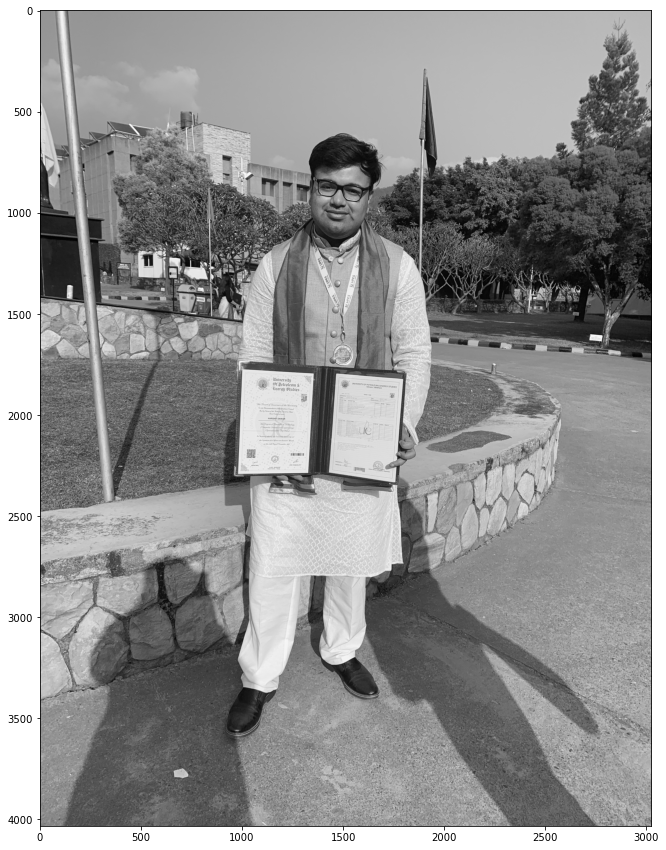

In [29]:
plt.figure(figsize = (35, 15))
plt.imshow(image)
plt.show()

In [36]:
# Converting Image to Numpy Array
gs_image = np.array(list(image.getdata(band = 0)))

In [38]:
image.size

(3024, 4032)

In [42]:
# Creating a matrix from Image
gs_image.shape = image.size[1], image.size[0]

gs_image = np.matrix(gs_image)

In [44]:
gs_image.shape

(4032, 3024)

In [45]:
# To satisfy the complete SVD, below are the conditions
    # Left_Vectors Shape = (rows * rows) of original matrix
    # Diagonal Matrix Shape = (rows * columns) of original matrix 
    # Right_Vectors Shape = (rows * columns) of original matrix
"""
But at this point, no need to convert Diagonal matrix shape to other one, it's fine as data
compression doesn't require that.
"""
Left_Vectors, Diagonal_Matrix, Right_Vectors = np.linalg.svd(gs_image)

In [49]:
Diagonal_Matrix = np.diag(Diagonal_Matrix)

In [50]:
Left_Vectors.shape, Right_Vectors.shape, Diagonal_Matrix.shape

((4032, 4032), (3024, 3024), (3024, 3024))

## Recostructing the Image using the most dominant/influential vector

In [56]:
new_image = Left_Vectors[:, :1] * Diagonal_Matrix[:1, :1] * Right_Vectors[:1, :]

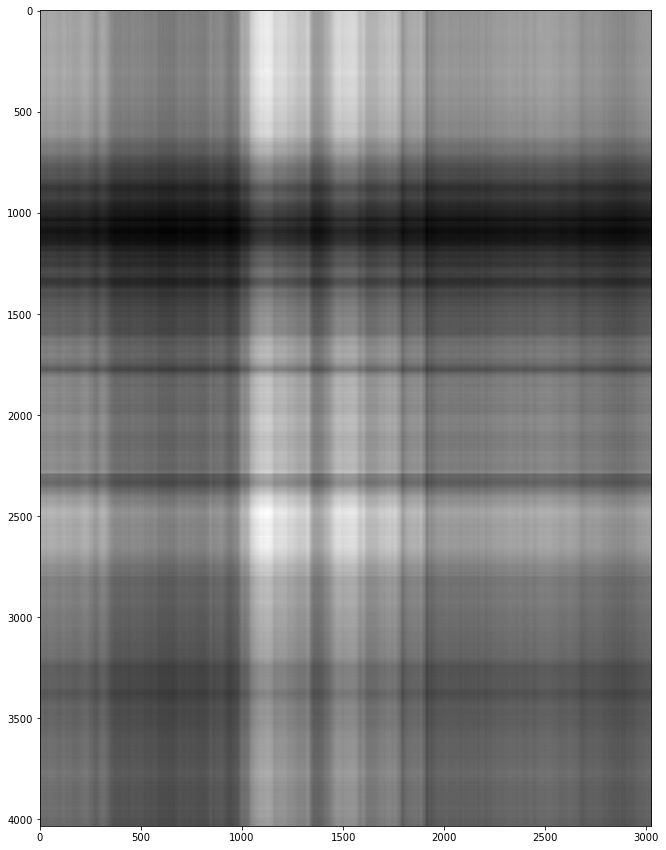

In [59]:
plt.figure(figsize = (35, 15))
plt.imshow(new_image, cmap = "gray")
plt.show()